## Chapter 7 of Pasha

git add -> commit -> push

Jeremy
1. mkdir Jeremy
2. cd jeremy
3. mkdir aspy07
4. cd aspy 07
5. run jupyter-lab under the shell Jeremy/aspy07
6. saved c07.ipynb in jupyter-lab
7. git add
8. git commit
9. git push 

### Section 7.2: Numerical Integration

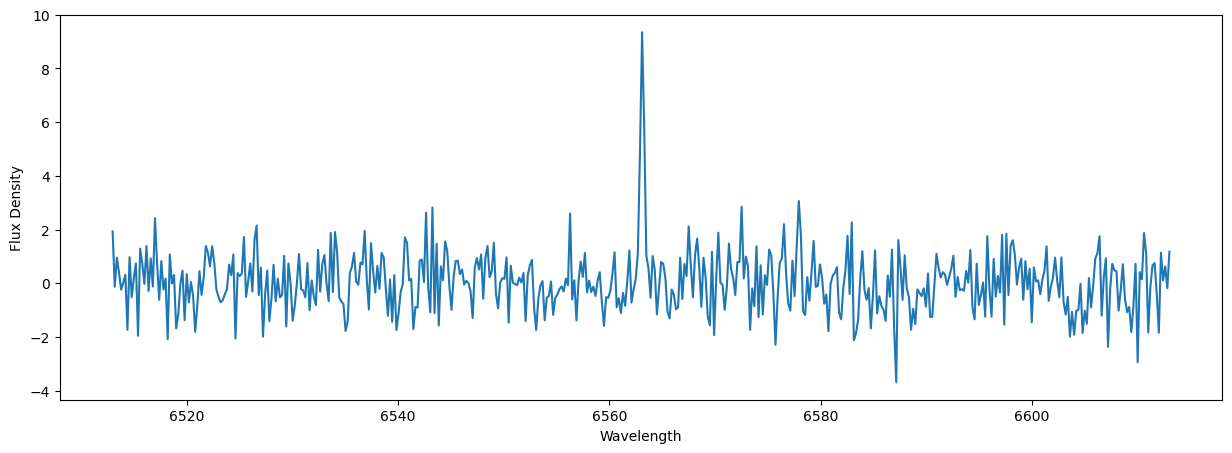

In [1]:
import numpy as np
import matplotlib.pyplot as plt

wl = np.linspace(6500, 6600, 500)+13
flux = np.zeros_like(wl)
flux[250]=10
flux[249]=4.95; flux[251]=5.01
flux[248]=1.2; flux[252]=1.1
flux[247]=0.11; flux[253]=0.10
noise=np.random.normal(0, 1, size=flux.size)
flux+=noise

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(wl, flux)
ax.set_xlabel('Wavelength')
ax.set_ylabel('Flux Density');

(6550.0, 6570.0)

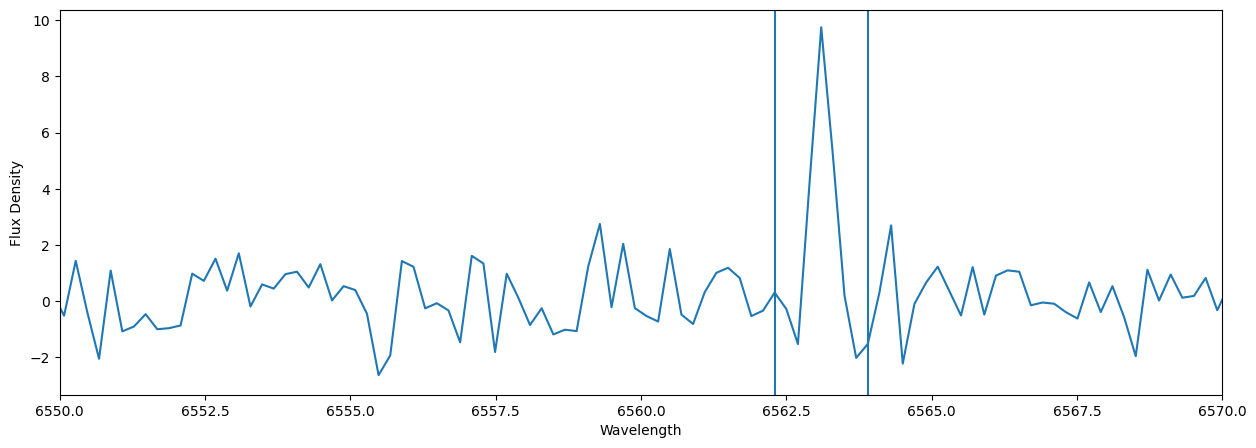

In [2]:
import numpy as np
import matplotlib.pyplot as plt

wl = np.linspace(6500, 6600, 500)+13
flux = np.zeros_like(wl)

flux[250] = 10
flux[249] = 4.95
flux[251] = 5.01
flux[248] = 1.2
flux[252] = 1.1
flux[247] = 0.11
flux[253] = 0.10

noise=np.random.normal(0, 1, size=flux.size)
flux += noise

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(wl, flux)
ax.set_xlabel('Wavelength')
ax.set_ylabel('Flux Density');

ax.axvline(wl[246])
ax.axvline(wl[254])
ax.set_xlim(6550, 6570)

In [3]:
from scipy.integrate import trapezoid, simpson

sub_wl = wl[246:254]
sub_fl = flux[246:254]

integral_trapz = trapezoid(sub_fl, sub_wl)
integral_simps = simpson(sub_fl, sub_wl)

print(f'Trapezoid Rule: {integral_trapz:.4f}')
print(f'Simpsons Rule: {integral_simps:.4f}')

Trapezoid Rule: 3.3479
Simpsons Rule: 3.3467


In [4]:
def gauss(x, amp, loc, sigma):
    return amp * np.exp(-((x - loc)**2) / (2 * sigma**2))

(6550.0, 6570.0)

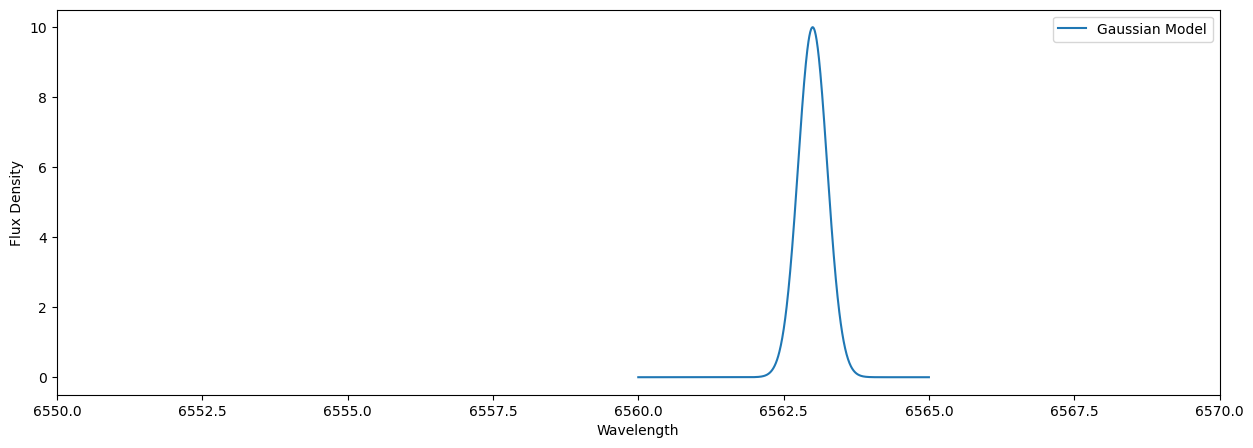

In [5]:
xx = np.linspace(6560, 6565, 1000)
gauss_test = gauss(xx, 10, 6563, 0.25)

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(xx, gauss_test, label='Gaussian Model')
ax.legend(loc='upper right')
ax.set_xlabel('Wavelength')
ax.set_ylabel('Flux Density')
ax.set_xlim(6550, 6570)

In [6]:
from scipy.integrate import quad

res = quad(func=gauss, a=6560, b=6565, args=(10, 6563, 0.25))
print(f'Numerical Integral with Quad: {res[0]:.4f}')

Numerical Integral with Quad: 6.2666


In [7]:
true_integral = 10 * np.sqrt(2 * np.pi * 0.25**2)
true_integral

np.float64(6.2665706865775)

### Section 7.3: Optimization

Optimization: finding a set of parameters that maximizes the value of a function.

In [8]:
#curve_fit: non-linear least squares
from scipy.optimize import curve_fit

res = curve_fit(f=gauss, xdata=wl, ydata=flux, p0=[10, 6563, 0.25])
res

(array([1.00098268e+01, 6.56311702e+03, 1.55719790e-01]),
 array([[ 1.06214506e+00,  7.92664986e-04, -9.47051890e-03],
        [ 7.92664986e-04,  3.96611322e-04, -2.06018877e-05],
        [-9.47051890e-03, -2.06018877e-05,  3.10819404e-04]]))

(6550.0, 6570.0)

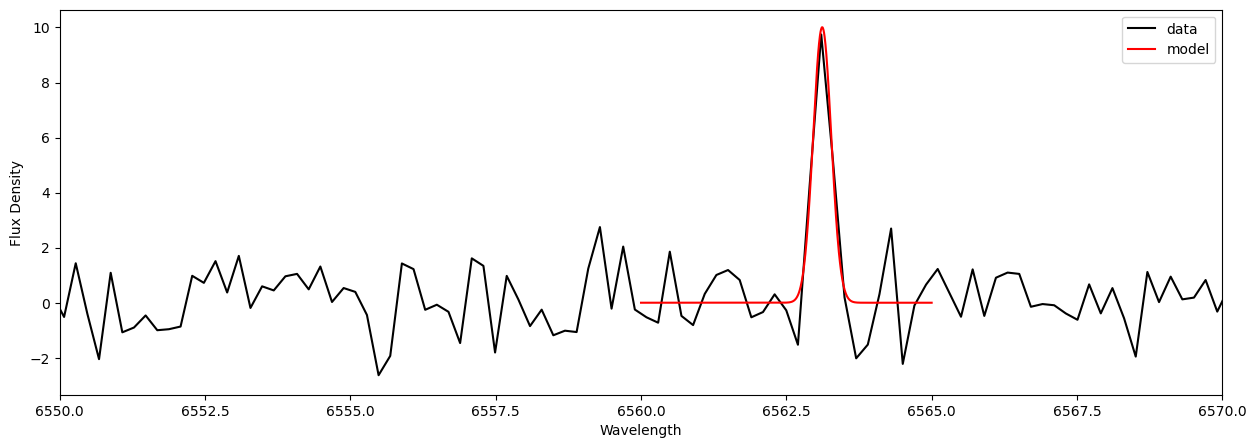

In [9]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(wl, flux, label='data', color='k')

params = res[0]
ax.plot(xx, gauss(xx, *params), label='model', color='r')
ax.set_xlabel('Wavelength')
ax.set_ylabel('Flux Density')
ax.legend()
ax.set_xlim(6550,6570)

#### Exercise 7.1: An SDSS spectrum

In [10]:
from astropy.coordinates import SkyCoord
from astropy import units as u
from astroquery.sdss import SDSS

coord = SkyCoord.from_name('J140404.9+005953.3')
xid = SDSS.query_region(coord, radius=5*u.arcsec, spectro=True)

spectra = SDSS.get_spectra(matches=xid)[0]
spec = spectra[1].data

Text(0, 0.5, 'Flux')

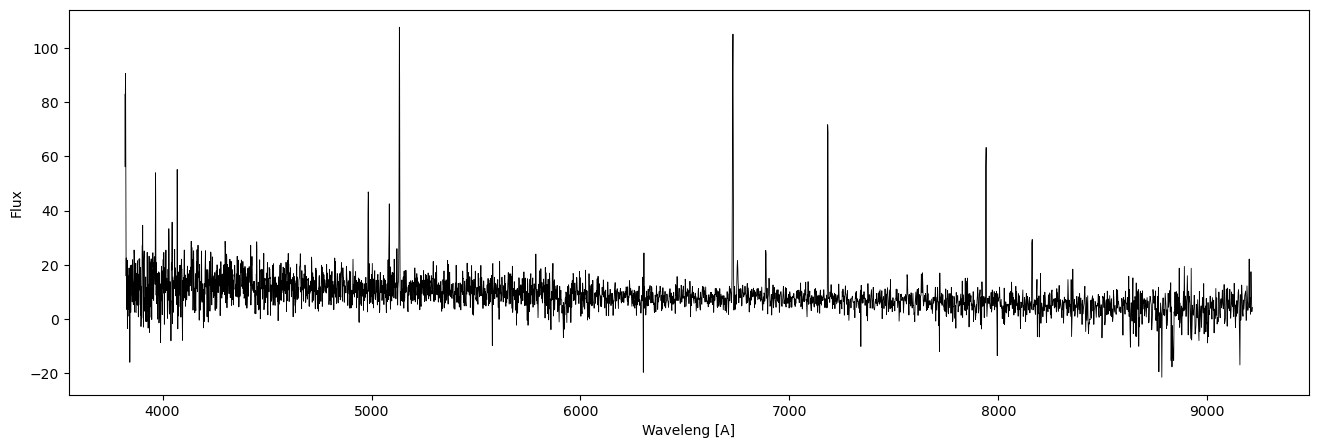

In [11]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16, 5))
ax.plot(10**spec['loglam'], spec['flux'], lw=0.6, color='k')
ax.set_xlabel('Waveleng [A]')
ax.set_ylabel('Flux')

Text(0, 0.5, 'Flux')

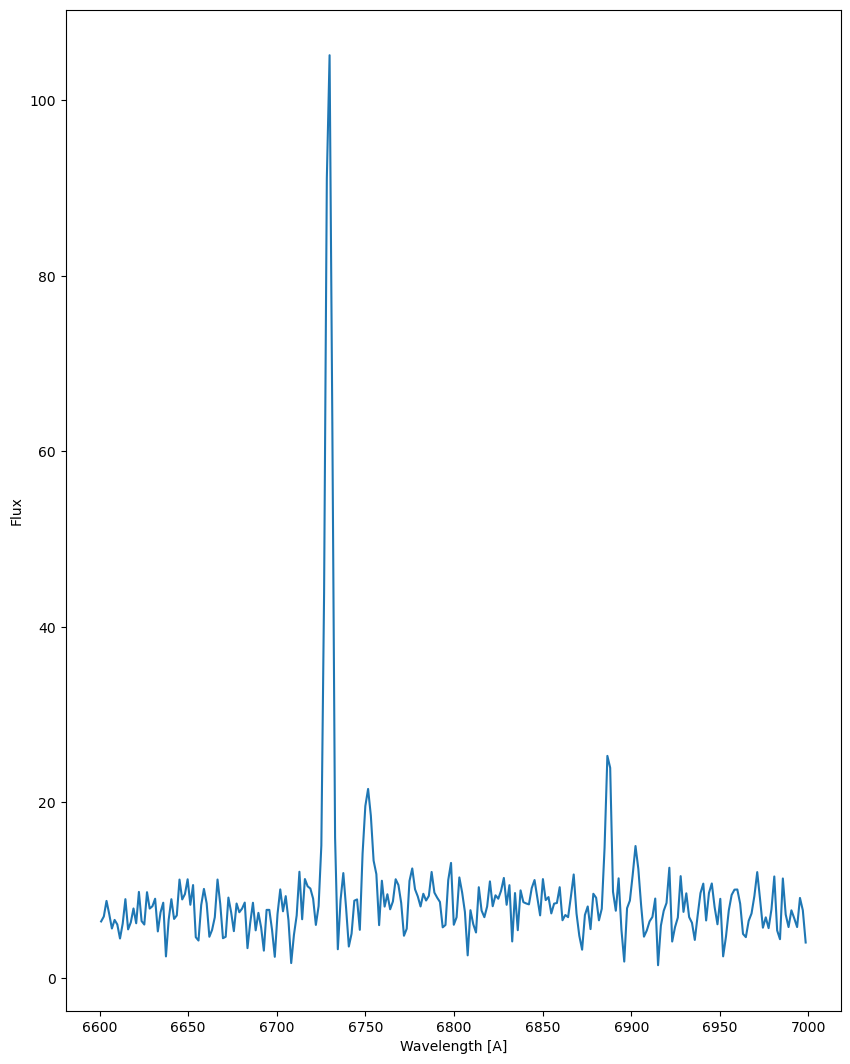

In [12]:
import numpy as np

wl = 10**spec['loglam']

ind, = np.where((wl > 6600) & (wl < 7000))
wl_use = 10**spec['loglam'][ind]
fl_use = spec['flux'][ind]

fig, ax = plt.subplots(figsize=(10,13))
ax.plot(wl_use, fl_use)
ax.set_xlabel('Wavelength [A]')
ax.set_ylabel('Flux')

In [13]:
from scipy.optimize import curve_fit

def gauss(x, amp, loc, sigma,offset):
    return amp * np.exp(-((x - loc)**2) / (2 * sigma**2)) + offset

fit = curve_fit(f=gauss, xdata=wl_use, ydata=fl_use, p0=[100, 6730, 0.25,10])
fit

(array([1.01215561e+02, 6.72927788e+03, 1.76252061e+00, 8.15964498e+00]),
 array([[ 7.56935909e+00, -1.13767353e-04, -8.70368389e-02,
         -2.87361445e-02],
        [-1.13767353e-04,  3.04658577e-03,  3.82520524e-06,
         -7.42872608e-07],
        [-8.70368389e-02,  3.82520524e-06,  3.07829062e-03,
         -1.00341013e-03],
        [-2.87361445e-02, -7.42872608e-07, -1.00341013e-03,
          4.07040062e-02]]))

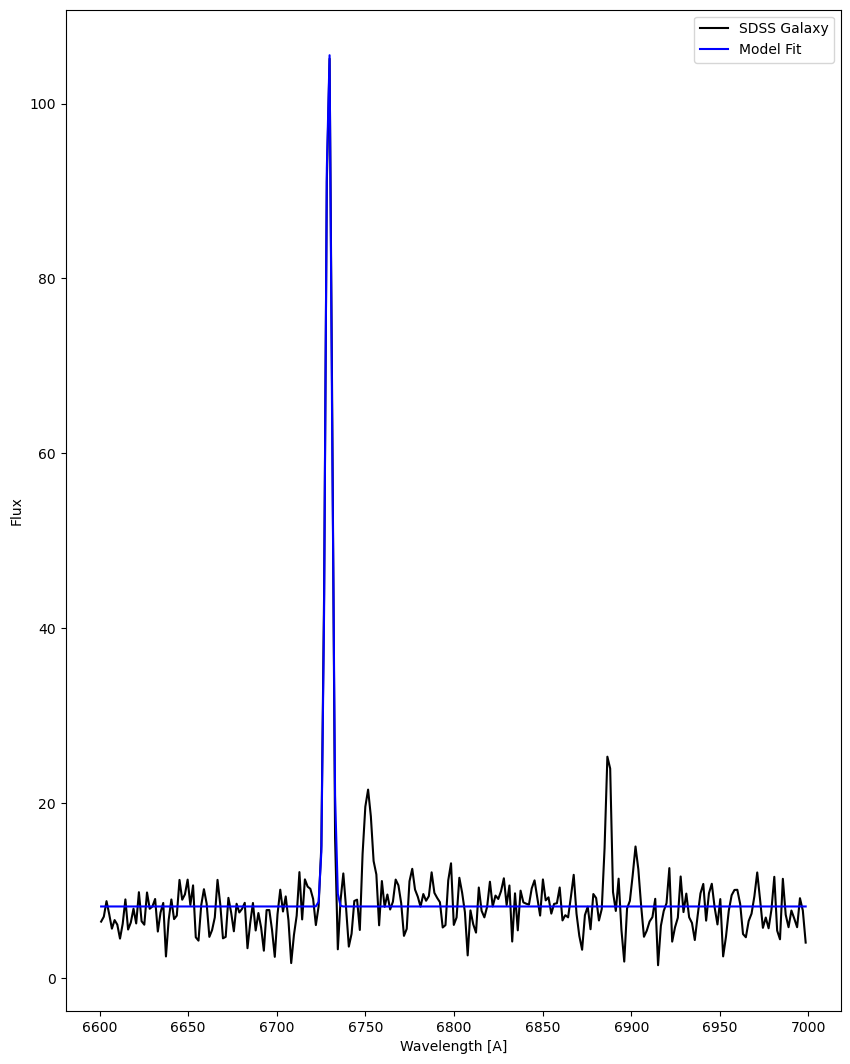

In [14]:
fig, ax = plt.subplots(figsize=(10,13))
ax.plot(wl_use, fl_use, label='SDSS Galaxy', color='k')

params = fit[0]
ax.plot(wl_use, gauss(wl_use,*params), label='Model Fit', color='blue')
ax.set_xlabel('Wavelength [A]')
ax.set_ylabel('Flux')
ax.legend()

#How to improve the fit?：added offset

In [15]:
def z_from_lam(lam_emit, lam_measured):
    lam_shift = lam_measured/lam_emit
    return lam_shift -1

z_from_lam(6564, fit[0][0])

#pretty off

np.float64(-0.9845802009090002)

### 7.4: Statistics

- Statistical measues
- Statistical modeling

### 7.4.1： Distributions

In [16]:
from scipy.stats import multivariate_normal
import numpy as np

cov = np.array([[1, 0], [0, 1]])
norm = multivariate_normal(mean=[0, 0], cov=cov)

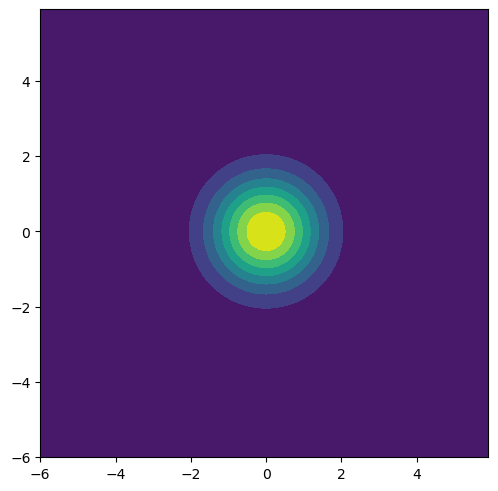

In [17]:
import matplotlib.pyplot as plt

x, y = np.mgrid[-6:6:0.1, -6:6:0.1]
pos = np.dstack((x,y))
fig, ax = plt.subplots(constrained_layout=True,)
ax.contourf(x, y, norm.pdf(pos)) #pdf: probability density function
ax.set_box_aspect(1)

In [18]:
norm.rvs()

array([-0.21413973, -0.96156388])

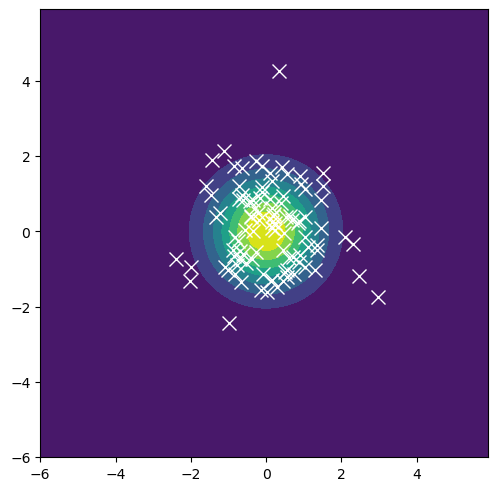

In [19]:
fig, ax = plt.subplots(constrained_layout=True)
samples = norm.rvs(size=100)
for i in samples:
    ax.plot(i[0], i[1], 'x', color='w', ms=10)

ax.contourf(x, y, norm.pdf(pos))
ax.set_box_aspect(1)

In [20]:
from scipy.stats import norm
norm_1d = norm(loc=0, scale=1) #frozen

print(f'Prob x<5: {norm.cdf(x=5)}') #Cumulative Distribution Function
print(f'Prob x<2: {norm.cdf(x=2)}')
print(f'Prob x<1: {norm.cdf(x=1)}')

Prob x<5: 0.9999997133484281
Prob x<2: 0.9772498680518208
Prob x<1: 0.8413447460685429
